In [39]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new, fourier_transform_matrix, fast_f_t
from logistics_exact_cavity import Driven_cavity_class,two_modes_cavity
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	


plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  


# 1. Single excitation

##  Single excitation , $\phi = 0,2\pi $ 

In [15]:
#  parameter definition, resonant condition 

gamma = 0.9
tau = 0.2 
phi = 2*np.pi 
t_max = 150*tau
dt = tau/75
w_ref = np.sqrt(gamma/tau)

In [16]:
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,100)

In [17]:
om_emitter = phi/tau
g=np.sqrt(gamma/tau)
exact = Driven_cavity_class(om_emitter,om_emitter,om_emitter,0,g)
pe,_=exact.evolve(t)

w1 = 2*np.pi/tau 
w2 = 3*np.pi/tau
exact_2=two_modes_cavity(om_emitter,w1,w2,g,g,0,om_emitter,3) # revelacion divina aqui, no se por que puse 1.5 
pe2,_,_=exact_2.evolve(t)

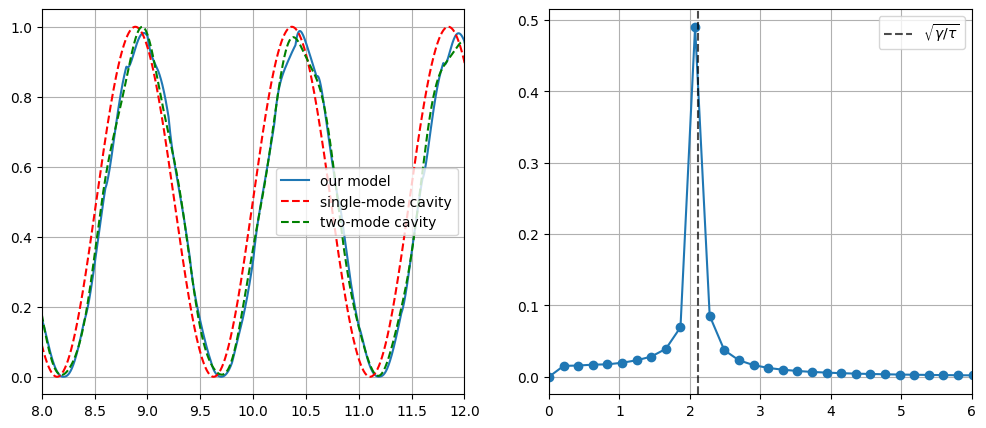

In [18]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model ')
axs[0].plot(t,pe,'r--',label='single-mode cavity')
axs[0].plot(t,pe2,'g--',label='two-mode cavity')
axs[0].legend()
axs[0].set_xlim(8,12)
axs[0].grid()

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7,label =r'$ \sqrt{\gamma/\tau} $')
axs[1].legend()
axs[1].set_xlim(0,6)
axs[1].grid()

plt.show()

Note: Single mode gives a single frequency $\Omega = \sqrt{g/\tau} $, however, more modes improves the fitting and sligthly modify this frequency. 

## Single excitation, $\phi = \pi$ 


In [24]:
#  parameter definition, off-resonant 

gamma = 0.8
tau = 0.2 
phi = np.pi 
t_max = 150*tau
dt = tau/75
w_ref = np.sqrt(np.pi**2+2*gamma*tau)/tau

In [25]:
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,200)

In [26]:
om_emitter = phi/tau
g=np.sqrt(gamma/tau)
w1 = 0
w2 = 2*np.pi/tau
exact=two_modes_cavity(om_emitter,w1,w2,g,g,0,om_emitter,3)
pe,_,_=exact.evolve(t)


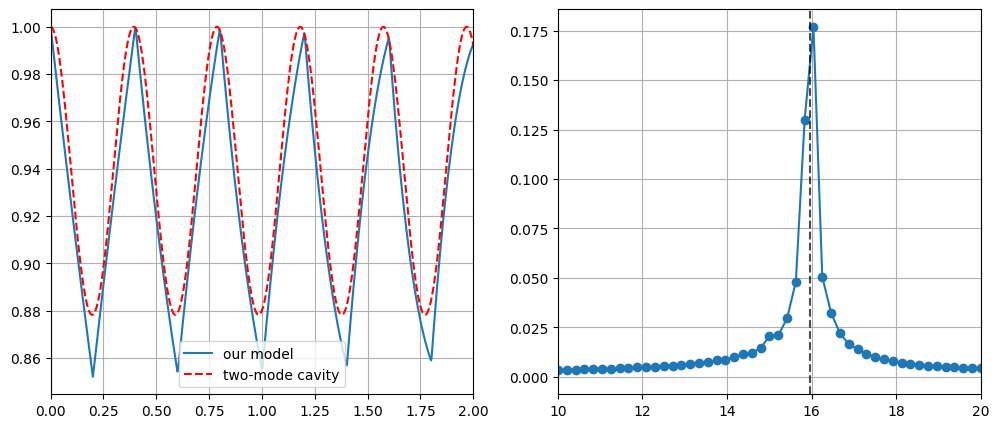

In [27]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model')
axs[0].plot(t,pe,'r--',label='two-mode cavity')
#axs[0].plot(t,0.87+0.13*np.cos(w_ref/2*t)**2)
axs[0].grid()
axs[0].legend()
axs[0].set_xlim(0,2)

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7)
axs[1].grid()
axs[1].set_xlim(10,20)

plt.show()

The reference frequency is now 

$$ \Omega_{eff} = \frac{\sqrt{\pi^{2}+2\gamma \tau}}{\tau} $$

This is because of the symmetry in the couplping to the cavity. it is analogous to $\Delta = \sqrt{\delta^{2}+2g^{2}} $

## Single excitation, general case 

In [28]:
#  parameter definition, resonant condition 

gamma = 1
tau = 0.15 
phi = 0.83*np.pi  
t_max = 150*tau
dt = tau/75

w_ref = np.sqrt(gamma/tau)

In [29]:
cavity = new_cav_model(gamma,phi,tau,0)
cavity.evolve(t_max,dt)
t,e = cavity.excited_state([1,0])
sigma=cavity.s_array

w,prueba = fourier_transform_matrix(t,sigma,200)

In [30]:
om_emitter = phi/tau
g=np.sqrt(gamma/tau)
w1 = 0
w2 = 2*np.pi/tau
exact=two_modes_cavity(om_emitter,w1,w2,g,g,0,om_emitter,3)
pe,_,_=exact.evolve(t)

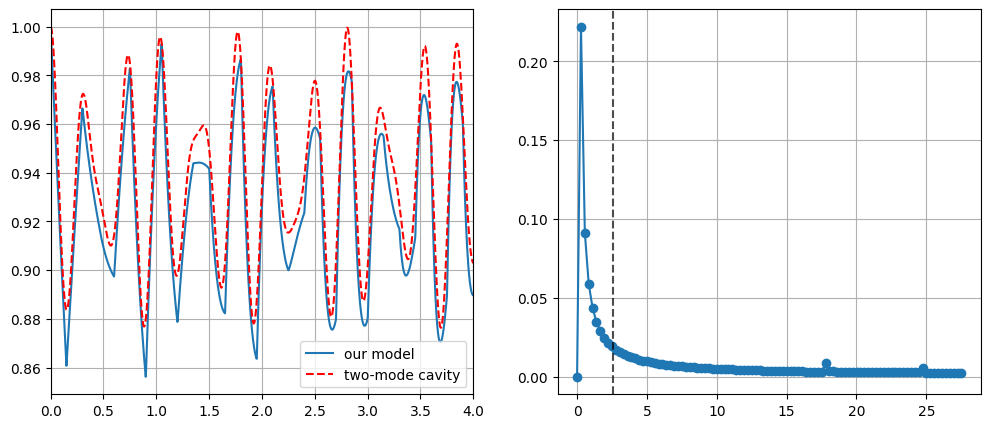

In [31]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].plot(t,e,label='our model')
axs[0].plot(t,pe,'r--',label='two-mode cavity')
axs[0].set_xlim(0,4)
axs[0].grid()
axs[0].legend()

axs[1].plot(w,np.abs(prueba[:,2]),'-o')
axs[1].axvline(w_ref,linestyle = '--',color='k',alpha=0.7)
axs[1].grid()
#axs[1].set_xlim(25,50)

plt.show()

If we keep $ \phi \leq 2\pi $, the modes of the cavity involved are always the same, and what changes i sthe resonance, so we can have an 'ok' fitting adjusting the frequency of the qubit in the two-mode cavity model. 

# Many excitation 

In [41]:
gamma = 1
tau = 0.15 
phi = np.pi  
t_max = 250*tau
dt = tau/50

omega_values = [gamma/10,gamma/5,gamma /2]

om_emitter = phi/tau
g=np.sqrt(gamma/tau)
w1 = 0
w2 = 2*np.pi/tau


In [42]:
t_list =[]
e_list =[]
pe_list=[]
for Om in omega_values:
	cavity = new_cav_model(gamma,phi,tau,Om)
	cavity.evolve(t_max,dt)
	t,e = cavity.excited_state([0,1])
	t_list.append(t)
	e_list.append(e)

	exact=two_modes_cavity(om_emitter,w1,w2,g,g,Om,om_emitter,3,start_ground=True)
	pe,_,_=exact.evolve(t)
	pe_list.append(pe)


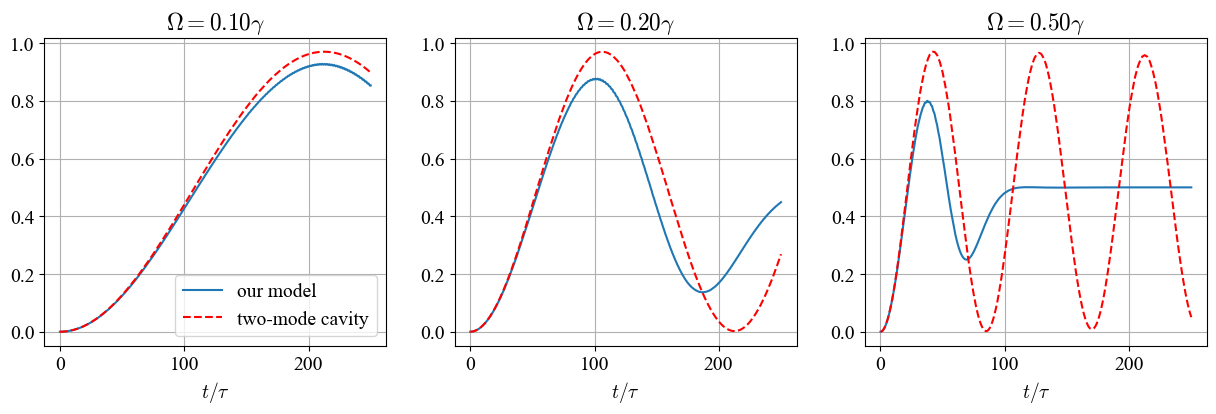

In [45]:
fig,axs = plt.subplots(1,len(t_list),figsize=(15,4))

for n in range(len(t_list)):
	axs[n].plot(t_list[n]/tau,e_list[n],label='our model')
	axs[n].plot(t_list[n]/tau,pe_list[n],'r--',label='two-mode cavity')
	axs[n].set_xlabel(r'$t/\tau$')
	axs[n].set_title(rf"$\Omega = {omega_values[n]:.2f}\gamma$")
	axs[n].grid()
axs[0].legend()
plt.show()

Our model remains accurate at the begining og the dynamics, when there is not a large number of excitations. Then it starts failing. I would argue this is reasonable, since we are 